In [9]:
import pandas as pd
def caso_who(ruta_archivo_csv:str)->dict:
    try:
        if ruta_archivo_csv[-3:] == 'csv':
            data = pd.read_csv(ruta_archivo_csv)
            data.date = pd.to_datetime(data.date)
            casos =  data.total_cases_per_million * data.population / 1000000  
            camas =   data.hospital_beds_per_thousand * data.population / 1000
            data['promedio'] = casos / camas
            new_data = pd.DataFrame({'continent': data.continent,
                        'date': data.date,
                       'promedio':data.promedio})
            new_data.groupby(by=['continent','date'])['promedio'].mean().reset_index()
            df_respuesta = new_data.pivot_table(index='date',columns='continent', values='promedio')
            
            return df_respuesta#.to_dict()
        else:
            return 'Extensión inválida.'
    except:
        return 'Error al leer el archivo de datos.'

s = caso_who('owid-covid-data.csv')

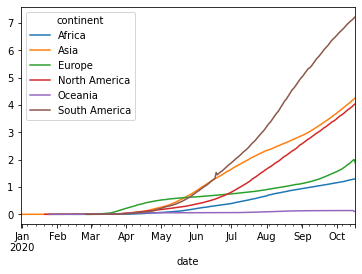

In [11]:
s.plot()